<a href="https://colab.research.google.com/github/majiddaeinejad/quera-ai-bootcamp-divar/blob/statistical_analysis/Question_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Setup cell

In [10]:
!pip install arabic-reshaper python-bidi jdatetime utm --quiet

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import arabic_reshaper
from bidi.algorithm import get_display
import jdatetime

import geopandas as gpd
from shapely.geometry import Polygon
import folium
from branca.colormap import StepColormap


rcParams['font.family'] = 'DejaVu Sans'

def fa_label(text):
    return get_display(arabic_reshaper.reshape(text))

Load data

In [11]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)


file_path = '/content/drive/MyDrive/Colab Notebooks/Divar.csv'


df = pd.read_csv(file_path , encoding='utf-8')

Mounted at /content/drive


/tmp/ipython-input-1578516001.py:9: DtypeWarning: Columns (11,27,29,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path , encoding='utf-8')


تعداد آگهی‌های منتشر شده در ماه‌های مختلف را برای فروش و اجاره بررسی کنید. آیا تعداد آگهی‌های فروش و اجاره در زمان‌های مشخصی از سال افزایش چشم‌گیری داشته است؟



In [12]:
df_2 = df[df['cat2_slug'] != 'real-estate-services'].copy()

ad_type_mapping = {
    'residential-sell': 'Sale',
    'residential-rent': 'Rent',
    'commercial-rent': 'Rent',
    'commercial-sell': 'Sale',
    'temporary-rent': 'Rent'
}

df_2['ad_type'] = df_2['cat2_slug'].map(ad_type_mapping)

print(df_2['ad_type'].value_counts())



ad_type
Sale    597569
Rent    383028
Name: count, dtype: int64


In [13]:
print(df['created_at_month'].unique())

['2024-08-01 00:00:00' '2024-05-01 00:00:00' '2024-10-01 00:00:00'
 '2024-06-01 00:00:00' '2024-09-01 00:00:00' '2024-11-01 00:00:00'
 '2024-07-01 00:00:00' '2024-12-01 00:00:00' '2024-04-01 00:00:00'
 '2025-01-01 00:00:00' '2024-03-01 00:00:00' '2024-01-01 00:00:00'
 '2025-02-01 00:00:00' '2024-02-01 00:00:00' '2023-11-01 00:00:00'
 '2023-09-01 00:00:00' '2023-10-01 00:00:00' '2023-07-01 00:00:00'
 '2023-12-01 00:00:00' '2023-05-01 00:00:00' '2023-03-01 00:00:00'
 '2023-04-01 00:00:00' '2023-06-01 00:00:00' '2023-08-01 00:00:00'
 '2023-02-01 00:00:00' '2021-05-01 00:00:00' '2022-11-01 00:00:00'
 '2022-07-01 00:00:00' '2022-05-01 00:00:00' '2022-06-01 00:00:00'
 '2023-01-01 00:00:00' '2022-10-01 00:00:00' '2021-12-01 00:00:00'
 '2020-12-01 00:00:00' '2022-12-01 00:00:00' '2022-04-01 00:00:00'
 '2022-09-01 00:00:00' '2022-08-01 00:00:00' '2021-06-01 00:00:00'
 '2022-02-01 00:00:00' '2020-02-01 00:00:00' '2022-01-01 00:00:00'
 '2025-03-01 00:00:00' '2021-02-01 00:00:00' '2022-03-01 00:00

In [14]:
df_2['created_at_month'] = pd.to_datetime(df_2['created_at_month'])


In [15]:
def get_persian_month(date):
    jd = jdatetime.datetime.fromgregorian(datetime=date)
    months = ['فروردین', 'اردیبهشت', 'خرداد', 'تیر', 'مرداد', 'شهریور',
              'مهر', 'آبان', 'آذر', 'دی', 'بهمن', 'اسفند']
    return months[jd.month - 1]


df_2['persian_month'] = df_2['created_at_month'].apply(get_persian_month)


month_order = ['فروردین', 'اردیبهشت', 'خرداد', 'تیر', 'مرداد', 'شهریور',
               'مهر', 'آبان', 'آذر', 'دی', 'بهمن', 'اسفند']
df_2['persian_month'] = pd.Categorical(df_2['persian_month'], categories=month_order, ordered=True)


monthly_counts = df_2.groupby(['persian_month', 'ad_type']).size().unstack(fill_value=0)
monthly_counts


/tmp/ipython-input-3327378188.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_counts = df_2.groupby(['persian_month', 'ad_type']).size().unstack(fill_value=0)


ad_type,Rent,Sale
persian_month,,
فروردین,1458,5476
اردیبهشت,34674,71621
خرداد,51334,71631
تیر,55516,75142
مرداد,56738,73470
شهریور,51871,67773
مهر,49015,75298
آبان,42399,77369
آذر,38926,75678


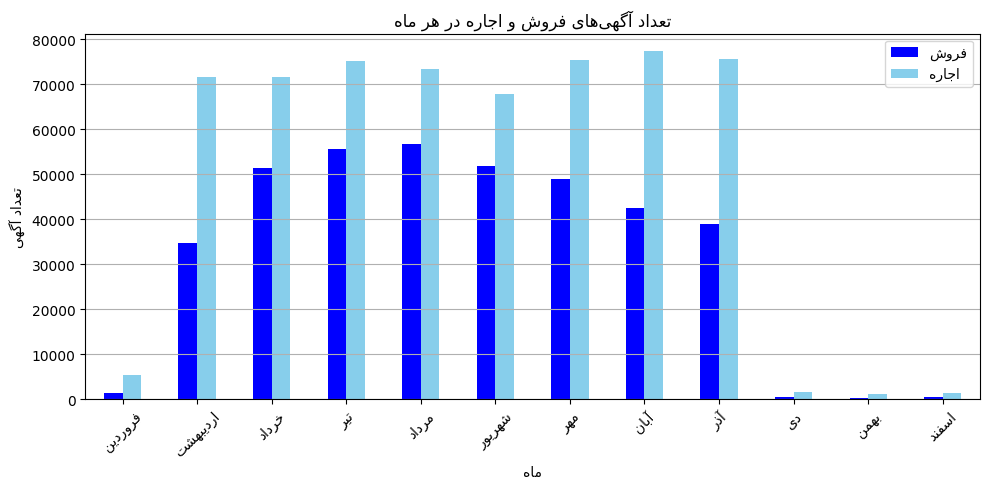

In [16]:
labels = [get_display(arabic_reshaper.reshape(month)) for month in monthly_counts.index]


monthly_counts.plot(kind='bar', figsize=(10, 5), color=['blue', 'skyblue'])

plt.title(get_display(arabic_reshaper.reshape('تعداد آگهی‌های فروش و اجاره در هر ماه')))
plt.xlabel(get_display(arabic_reshaper.reshape('ماه')))
plt.ylabel(get_display(arabic_reshaper.reshape('تعداد آگهی')))

plt.xticks(ticks=range(len(labels)), labels=labels, rotation=45)

plt.legend([get_display(arabic_reshaper.reshape('فروش')), get_display(arabic_reshaper.reshape('اجاره'))])

plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [17]:
changes = monthly_counts.diff()
percent_change = monthly_counts.pct_change() * 100

print(percent_change['Sale'].sort_values(ascending=False))
print(percent_change['Rent'].sort_values(ascending=False))



persian_month
اردیبهشت    1207.907232
اسفند         24.821429
مهر           11.103242
تیر            4.901509
آبان           2.750405
خرداد          0.013962
آذر           -2.185630
مرداد         -2.225120
شهریور        -7.754185
بهمن         -29.692404
دی           -97.895029
فروردین             NaN
Name: Sale, dtype: float64
persian_month
اردیبهشت    2278.189300
اسفند        102.304147
خرداد         48.047528
تیر            8.146647
مرداد          2.201167
مهر           -5.505967
آذر           -8.191231
شهریور        -8.578025
آبان         -13.497909
بهمن         -50.793651
دی           -98.867081
فروردین             NaN
Name: Rent, dtype: float64


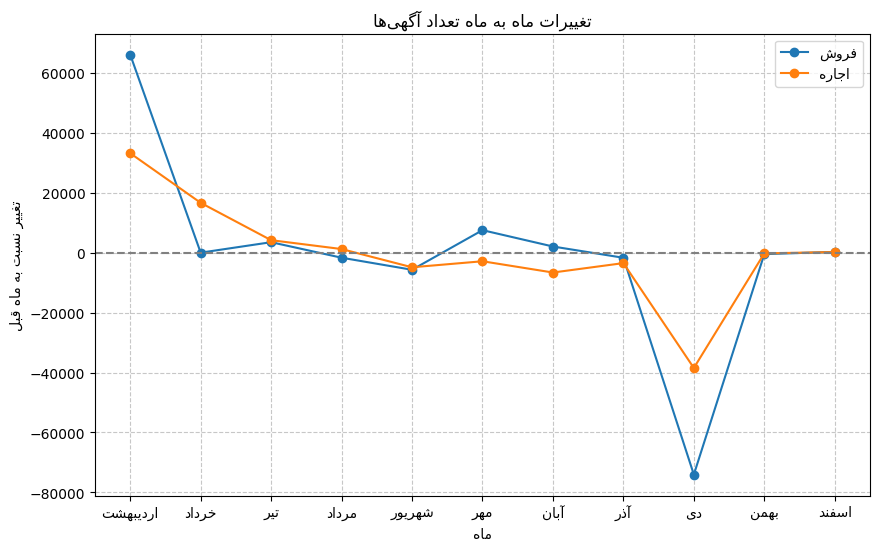

In [18]:
labels = [get_display(arabic_reshaper.reshape(month)) for month in monthly_counts.index]


months_fixed = [fa_label(m) for m in changes.index]

plt.figure(figsize=(10, 6))
plt.plot(months_fixed, changes['Sale'], marker='o', label=fa_label('فروش'))
plt.plot(months_fixed, changes['Rent'], marker='o', label=fa_label('اجاره'))


plt.axhline(0, color='gray', linestyle='--')

plt.title(fa_label('تغییرات ماه به ماه تعداد آگهی‌ها'))
plt.xlabel(fa_label('ماه'))
plt.ylabel(fa_label('تغییر نسبت به ماه قبل'))

plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


